# STAT 345: Nonparametric Statistics

## Lesson 08.1: Tests for Families of Distributions

**Reading: Conover Section 6.2**

*Prof. John T. Whelan*

Tuesday 18 March 2024

These lecture slides are in a computational notebook.  You have access to them through http://vmware.rit.edu/

Flat HTML and slideshow versions are also in MyCourses.

The notebook can run Python commands (other notebooks can use R or Julia; "Ju-Pyt-R").  Think: computational data analysis, not "coding".

Standard commands to activate inline interface and import libraries:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

## The Lilliefors Test for Normality

- Kolmogorov test compares data $\{x_i\}$ (via empirical distribution $\hat{F}(x;\{x_i\})$ to a single cdf $F^*(x)$

- What if we want to know if the sampling distribution belongs to a family, e.g. normal $N(\mu,\sigma^2)$ w/unspecified unspecified parameters $\mu$ and $\sigma$.

- Obvious generalization: estimate $\mu$ & $\sigma$ from data, via $\overline{x}=\frac{1}{n}\sum_{i=1}^n x_i$ & $s=\sqrt{\frac{1}{n-1}\sum_{i=1}^n(x_i-\overline{x})^2}$.  Statistic is then
$$T = \sup_x{\left\lvert\Phi\left(\frac{x-{{\overline{x}}}}{s}\right)-\hat{F}(x;\{x_i\})\right\rvert}$$
where $\Phi\left(\frac{x-\mu}{\sigma}\right)$  is the cdf of $N(\mu,\sigma^2)$.

- When the parameters of the distribution are estimated from the data, the test is known as the *Lilliefors Test*.

As an example, consider the data set from lesson 07.2, which has histogram

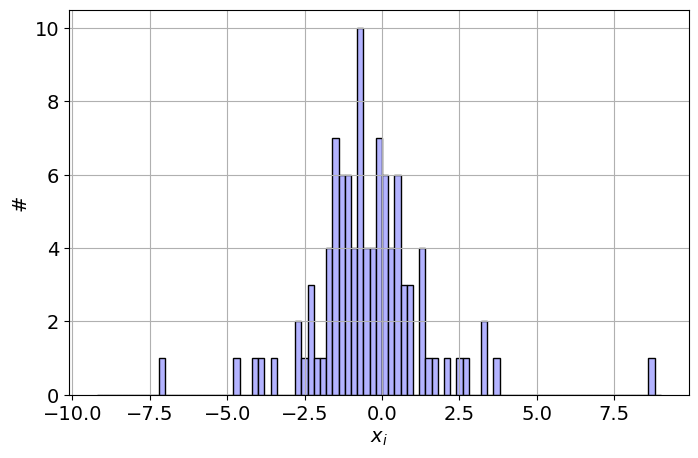

In [3]:
x_i = np.array([-0.6106, -0.2310, -1.0372, -2.1245, 0.7290, 0.0136, -1.4146, -1.0677, -2.6589,  0.0709, 0.7706, 3.7948, -1.4862, -0.0701, -1.3513, -0.8655, -0.2769, -0.5387, 0.2276, -0.0120, -3.8585, 0.0835, -1.7957, 1.0703, -0.6074, -0.8175, -0.9521, 0.6801, 2.5205, 0.1078, -1.2938, -0.6855, -2.1204, -0.3684, -0.4298, -1.2256, 1.3653, -2.2061, -1.6217, -2.3376,    -1.1890, -1.9026, 0.3447, 2.7895, -0.5585, 1.6562, -3.4243, -0.9751,0.6078, -0.6654, -1.5980, 0.0568, 1.0073, -4.0373, -1.1408, 1.3027,-0.0781, 2.2652, -2.5808, 0.5551, 1.7056, 0.6155, 0.3708, -0.7449,0.7294, -1.6789, 0.2668, 1.3637, -1.1435, -4.5174, 0.1851, -0.4093,-0.1503, 0.4865, -0.7953, -1.6489, -0.5183, 0.6161, -0.5087, -1.3621,3.3161, 0.3884, -1.0508, 0.5203, 0.2696, -1.4678, -1.4626, 0.9397,-7.0490, -0.6900, 3.3881, -0.6778, -1.4596, 0.1268, 8.7628, -1.0302,1.3928, -0.4755, -0.1050, -1.2061 ])
xmax = np.ceil(max(np.abs(x_i)))+0.1; xmin = -xmax
myhist,mybins = np.histogram(x_i,bins=np.arange(xmin,xmax+0.1,0.2));mywidths=mybins[1:]-mybins[:-1]
plt.bar(mybins[:-1],myhist,mywidths,color='b',ec='k',fc=[0.7,0.7,1.0]);plt.xlabel(r'$x_i$');plt.ylabel('#');plt.grid();

In [4]:
n = len(x_i); xbar = np.mean(x_i); s = np.std(x_i, ddof=1); n, xbar, s

(100, -0.34903799999999996, 1.8575830646778027)

As before, we don’t need to calculate the difference between the
empirical cdf $\hat{F}(x;\{x_i\})$ at every possible $x$, just at the
actual data values, using
$$\hat{F}(x^{(i)};\{x_i\}) = \frac{i}{n} \qquad\hbox{and}\qquad
    \hat{F}(x^{(i)}-\epsilon;\{x_i\}) = \frac{i-1}{n}$$

In [5]:
x_i.sort(); Fhatp_i = np.arange(n)/n; Fhatm_i = (1+np.arange(n))/n
stardist = stats.norm(loc=xbar,scale=s); Fstar_i = stardist.cdf(x_i)
np.set_printoptions(threshold=20); Fhatp_i, Fhatm_i

(array([0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99]),
 array([0.01, 0.02, 0.03, ..., 0.98, 0.99, 1.  ]))

In [6]:
Tp = max(Fstar_i-Fhatp_i); Tm = max(Fhatm_i-Fstar_i); Tp, Tm

(0.10702351016039596, 0.11334112306628319)

Note that the test is equivalent to first converting the data $\{x_i\}$
using $z_i = \frac{x_i-{{\overline{x}}}}{s}$ and then constructing the
Kolomogorov statistics of the $\{z_i\}$ where the target distribution is
standard normal:

In [7]:
z_i = (x_i - xbar)/s; Fstarz_i = stats.norm.cdf(z_i); max(Fstarz_i-Fhatp_i), max(Fhatm_i-Fstarz_i)

(0.10702351016039596, 0.11334112306628319)

We can plot the empirical cdf along with the normal one:

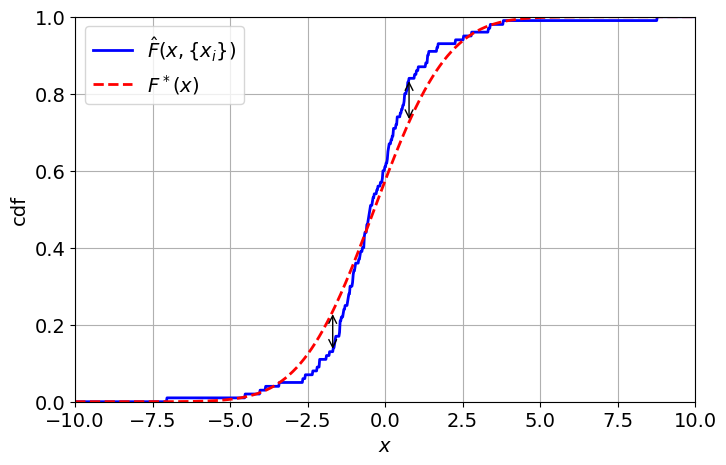

In [8]:
x_x = np.linspace(-10,10,1000); Fhat_x = np.mean(x_i[None,:] <= x_x[:,None],axis=-1); Fstar_x = stardist.cdf(x_x)
plt.plot(x_x,Fhat_x,'b-',lw=2,label=r'$\hat{F}(x,\{x_i\})$'); plt.plot(x_x,Fstar_x,'r--',lw=2,label=r'$F^*(x)$');
xp = np.argmax(Fstar_x-Fhat_x); xm = np.argmax(Fhat_x-Fstar_x)
plt.annotate('',xy=(x_x[xp],Fstar_x[xp]),xycoords='data',xytext=(x_x[xp],Fhat_x[xp]),textcoords='data',arrowprops=dict(arrowstyle='<->'));
plt.annotate('',xy=(x_x[xm],Fstar_x[xm]),xycoords='data',xytext=(x_x[xm],Fhat_x[xm]),textcoords='data',arrowprops=dict(arrowstyle='<->'));
plt.xlim(-10,10);plt.ylim(0,1);plt.xlabel(r'$x$');plt.ylabel('cdf');plt.legend(loc='upper left');plt.grid();

- Since we estimated the normal parameters rather than specifying them,
the null distribution of the statistic will not be the Kolmogorov
distribution.

- No closed-form expression for “Lilliefors distribution”, but we can estimate it with a Monte Carlo.  Generate samples of $n$, scale each by
sample mean & variance, and construct Kolmogorov
statistic:

In [9]:
np.random.seed(20230327); Nmonte = 10**5; x_Ii = stats.norm.rvs(size=(Nmonte,n)); x_Ii.sort(axis=-1);
xbar_I = np.mean(x_Ii,axis=-1); s_I = np.std(x_Ii,axis=-1,ddof=1); Fstar_Ii = stats.norm.cdf((x_Ii-xbar_I[:,None])/s_I[:,None])
Tp_I = np.max(Fstar_Ii-Fhatp_i[None,:],axis=-1); Tm_I = np.max(Fhatm_i[None,:]-Fstar_Ii,axis=-1)
print(np.mean(np.maximum(Tp_I,Tm_I)>=max(Tp,Tm)))

0.00307


We numerically estimate a $p$-value of $0.00307$, since $307$ of the
$100,\!000$ samples had a higher Kolmogorov statistic. Note that the Monte
Carlo uncertainty on that number is about $\sqrt{307}\approx
17.5$, which means the $p$-value is definitely between $0.0025$ and
$0.004$.  (Note that the Kolmogorov distribution would give an overestimated $p$-value of $0.14$, since we got a "better" match by tuning $\mu$ & $\sigma$.)

In [10]:
2*stats.ksone(n).sf(max(Tp,Tm))

0.14177596485585017

There are also tables of the Lilliefors distribution, including one reproduced in Conover as Table A14.  For $n\ge 31$, these are given as percentiles on the distribution of $T_1d_n=T_1(\sqrt{n}-0.01+0.83/\sqrt{n})$.  In our case this is

In [11]:
dn = np.sqrt(n) - 0.01 + 0.83/np.sqrt(n); dn

10.073

In [12]:
max(Tp,Tm)

0.11334112306628319

In [13]:
max(Tp,Tm) * dn

1.1416851326466706

We see in the table that the 99th percentile of $T_1d_n$ is $1.035$, so we can tell from the table that $p<0.01$, which is consistent with our value of $0.00307$.

We can get a closer look at what’s going on by zooming in a bit:

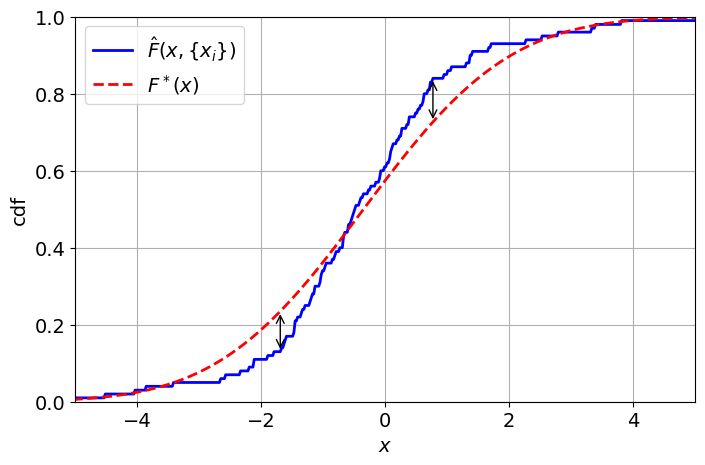

In [14]:
plt.plot(x_x,Fhat_x,'b-',lw=2,label=r'$\hat{F}(x,\{x_i\})$'); plt.plot(x_x,Fstar_x,'r--',lw=2,label=r'$F^*(x)$');plt.annotate('',xy=(x_x[xp],Fstar_x[xp]),xycoords='data',xytext=(x_x[xp],Fhat_x[xp]),textcoords='data',arrowprops=dict(arrowstyle='<->'));plt.annotate('',xy=(x_x[xm],Fstar_x[xm]),xycoords='data',xytext=(x_x[xm],Fhat_x[xm]),textcoords='data',arrowprops=dict(arrowstyle='<->'));plt.xlim(-5,5);plt.ylim(0,1);plt.xlabel(r'$x$');plt.ylabel('cdf');plt.legend(loc='upper left');plt.grid();

Although the most egregious feature of the distribution
is the large outliers, they're not directly causing unlikely
Lilliefors statistic value. Instead, it’s a mismatch in the middle of
the distribution. It's *sort of* caused by outliers, since
they have a big impact on $\overline{x}$ \& $s$,
used to estimate params $\mu$ \& $\sigma$ of the normal distribution.

Note that
these parameters do not produce the lowest possible Kolmogorov
statistic. We can, for example, get a “better fit” by using the sample
median and interquartile spread to estimate the parameters:

In [15]:
altloc = np.median(x_i); altscale = (np.percentile(x_i,75) - np.percentile(x_i,25))/ (stats.norm.ppf(.75) - stats.norm.ppf(.25)) ;
altloc, altscale, xbar, s

(-0.4921, 1.288084807437667, -0.34903799999999996, 1.8575830646778027)

In [16]:
altdist = stats.norm(loc=altloc,scale=altscale); Falt_i = altdist.cdf(x_i);
altTp = max(Falt_i-Fhatp_i); altTm = max(Fhatm_i-Falt_i); altTp, altTm

(0.053847649548617094, 0.038589047071011566)

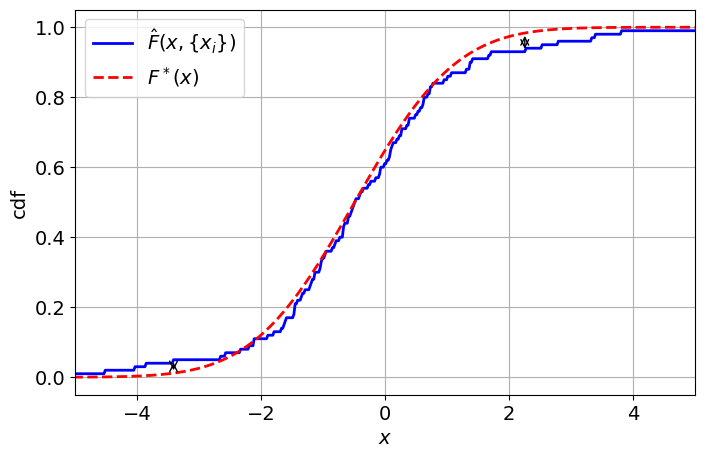

In [17]:
Falt_x=altdist.cdf(x_x); altxp = np.argmax(Falt_x-Fhat_x); altxm = np.argmax(Fhat_x-Falt_x)
plt.plot(x_x,Fhat_x,'b-',lw=2,label=r'$\hat{F}(x,\{x_i\})$');plt.plot(x_x,Falt_x,'r--',lw=2,label=r'$F^*(x)$');
plt.annotate('',xy=(x_x[altxp],Falt_x[altxp]),xycoords='data',xytext=(x_x[altxp],Fhat_x[altxp]),textcoords='data',arrowprops=dict(arrowstyle='<->'));
plt.annotate('',xy=(x_x[altxm],Falt_x[altxm]),xycoords='data',xytext=(x_x[altxm],Fhat_x[altxm]),textcoords='data',arrowprops=dict(arrowstyle='<->'));
plt.xlabel(r'$x$');plt.ylabel('cdf');plt.legend(loc='upper left');plt.grid();plt.xlim(-5,5);

This modified test would not register the effect of the outliers \& would give smaller Kolmogorov/Lilliefors type statistics.  Since the procedure is different, the $p$-value estimation has to be redone:

In [18]:
altloc_I = np.median(x_Ii,axis=-1)
altscale_I = ( (np.percentile(x_Ii,75,axis=-1) - np.percentile(x_Ii,25,axis=-1))
            / (stats.norm.ppf(.75) - stats.norm.ppf(.25)) )
altFstar_Ii = stats.norm.cdf((x_Ii-altloc_I[:,None])/altscale_I[:,None])
altTp_I = np.max(altFstar_Ii-Fhatp_i[None,:],axis=-1)
altTm_I = np.max(Fhatm_i[None,:]-altFstar_Ii,axis=-1)
print(np.mean(np.maximum(altTp_I,altTm_I)>max(altTp,altTm)))

0.77659


A few things to note:
  - The fact that the Lilliefors test uses the sample mean and sample median allows it to be influenced by large outliers which would otherwise not have much impact on the Kolmogorov statistic.

  - The Lilliefors test is not wrong in this example.  The data really do fit a normal distribution badly, in that the mean and variance (which are influenced by the outliers) are inconsistent with the shape of the empirical distribution near the most likely values.  It just doesn't detect this as efficiently as some other tests which we'll examine next (the Cramér-von Mises and Anderson-Darling tests).

  - If you use some method other than the sample mean and variance to optimize the fit, the resulting Kolmogorov statistic will have a null distribution which is not given by the tables for either the Lilliefors or the Kolmogorov distribution.

## The Cramér-von Mises Test

We’ve seen a drawback to Kolmogorov-Smirnov type tests, which we can
consider in two parts:

1.  Using the maximum separation between the empirical and hypothesized
    cdfs bases the results on what’s happening on one point rather than
    overall, and

2.  The “worst” mismatch will generally not be in the tails, since the
    hypothetical cdf is close to $0$ or $1$ there, and
    ${\left\lvert F^{*}(x)-\hat{F}(x;\{x_i\})\right\rvert}$ is not
    significantly different if $F^{*}(x)=0.01$ or $10^{-6}$.

We can address the first of these by considering some measure like the
total area between the cdf curves
$$\int_{-\infty}^{\infty} {\left\lvert\hat{F}(x;\{x_i\})-F^{*}(x)\right\rvert}\,dx$$
or a sort of quadratic distance
$$\int_{-\infty}^{\infty} \left(\hat{F}(x;\{x_i\})-F^{*}(x)\right)^2\,dx
  \ .$$

 One problem with these possible statistics is that they’d change
if we made some transformation of the data, like
${\color{royalblue}{Y}}={\color{royalblue}{X}}^3$, while the cdfs
themselves would not, since
$P({\color{royalblue}{X}}^3{\mathbin{\le}}x^3) =
P({\color{royalblue}{X}}{\mathbin{\le}}x)$. So the natural thing to do
is actually to use the hypothesized probability *density*
$f^{*}(x)={F^{*}}'(x)$ as a “measure” for the integral: $$\begin{split}
    \frac{T_{\text{CvM}}}{n}
    =\int_{-\infty}^{\infty} \left(\hat{F}(x;\{x_i\})-F^{*}(x)\right)^2\,f^{*}(x)\,dx
    =\int_{0}^{1} \left(\hat{F}({F^{*}}^{-1}(u);\{x_i\})-u\right)^2\,du
  \end{split}$$ where the last step uses the change of variables $u=F^{*}(x)$, and ${F^{*}}^{-1}(u)$ is the inverse of the
hypothesized cdf.<br>This is known as the Cramér-von Mises statistic.

You might think this is a lot harder to evaluate than the Kolmogorov
statistic, since you have to integrate over all $x$ (or equivalently all
$u$), but you can break up the integral into $n+1$ pieces divided by the
actual $x_i$ values. If $x^{(i)}$ denotes the $i$th order statistic of
the data then,

-   For $x<x^{(1)}$, $\hat{F}(x;\{x_i\})=0$ and the integrand is
    $[F^{*}(x)]^2$, which makes the integral
    $$\int_{0}^{F^{*}(x^{(1)})} u^2\,du = \frac{[F^{*}(x^{(1)})]^3}{3}$$

-   For $x^{(i)}<x<x^{(i+1)}$, $i=1,\ldots n-1$,
    $\hat{F}(x;\{x_i\})=\frac{i}{n}$ and the integrand is
    $[F^{*}(x)-i/n]^2$, which makes the integral
    $$\int_{F^{*}(x^{(i)})}^{F^{*}(x^{(i+1)})} (u-i/n)^2\,du
        = \frac{[F^{*}(x^{(i+1)})-i/n]^3}{3}
        - \frac{[F^{*}(x^{(i)})-i/n]^3}{3}$$

-   for $x^{(n)}<x$, $\hat{F}(x;\{x_i\})=1$ and the integrand is
    $[F^{*}(x)-1]^2$, which makes the integral
    $$\int_{F^{*}(x^{(n)})}^{1} (u-1)^2\,du =
        \frac{[F^{*}(x^{(n)})-1]^3}{3}$$

Combining these terms with a little bit of algebra gives the expression
$$T_{\text{CvM}} = \frac{1}{12n}
  + \sum_{i=1}^n \left(\frac{2i-1}{2n} - F^*(x^{(i)})\right)^2$$
We can calculate this for the data above:

In [19]:
i_i = np.arange(1,n+1); TCvM = 1./(12.*n) + np.sum(((2*i_i-1)/(2.*n)-Fstar_i)**2); TCvM

0.3373679828059199

As a computational aside, note that (at least for continuous distributions)
$$
\frac{2i-1}{2n}=\frac{\hat{F}(x^{(i)})+\hat{F}(x^{(i)}-\epsilon)}{2}
$$

In [20]:
(2*i_i-1)/(2*n), .5*(Fhatp_i + Fhatm_i)

(array([0.005, 0.015, 0.025, ..., 0.975, 0.985, 0.995]),
 array([0.005, 0.015, 0.025, ..., 0.975, 0.985, 0.995]))

So we have $T_{\text{CvM}}=0.337$, but to assess the statistical significance of the discrepnacy between the distributions, we need to know the null distribution of the statistic.  And in particular, we need the null distribution in the case where the mean and variance of the normal distribution are taken to be the sample mean and sample variance.  Standard tables of this are not so common.

There is one in a Master's thesis from 1991, at https://apps.dtic.mil/sti/citations/ADA238630 \["New Modified Anderson-Darling and Cramer-Von Mises Goodness-of-Fit Tests for a Normal Distribution with Specified Parameters" by Goksel Kahya, Air Force Institute of Technology\] but the relevant table 4.15 only goes up to $n=80$.  (There are also some issues with the precision quoted in the table, and the non-monotonic nature of the percentiles leads me to believe there's siginificant undocumented Monte Carlo error.)

So the most reliable thing to do is run a Monte Carlo ourselves.  In fact, we already have the relevant Monte Carlo samples from checking the Lilliefors test, so we just re-use them:

In [21]:
TCvM_I = 1./(12.*n) + np.sum(((2*i_i[None,:]-1)/(2.*n)-Fstar_Ii)**2,axis=-1); np.mean(TCvM_I>=TCvM), np.sum(TCvM_I>=TCvM)

(6e-05, 6)

Only 6 out of the $10^5$ Monte Carlo samples give us a statistic value as high as $0.337$, so we have a $p$-value estimate of $\mathcal{O}(10^{-4})$.  (The Monte Carlo error associated with 6 trials is something like $\sqrt{6}\sim 2.5$, so we can't really claim this $p$-value is estimated to better than an order of magnitude.)

Incidentally, the table in the Master's thesis above has roughly constant percentiles for $n\gtrsim 50$.  The 99th percentile is about $0.18$, and we can check this with our Monte Carlo:

In [22]:
np.mean(TCvM_I >= 0.18)

0.00942

So everything looks pretty consistent.  We can check the 80th, 85th, 90th, and 95th percentiles from the table as well:

In [23]:
for T in (0.08, 0.09, 0.10, 0.125, 0.18):
    print('P(TCvM>=%g)=%g'%(T,np.mean(TCvM_I>=T)))

P(TCvM>=0.08)=0.20537
P(TCvM>=0.09)=0.14979
P(TCvM>=0.1)=0.11053
P(TCvM>=0.125)=0.0507
P(TCvM>=0.18)=0.00942


or conversely make our own estimates:

In [24]:
for p in (80, 85, 90, 95, 99):
    T = np.percentile(TCvM_I,p)
    print('P(TCvM>=%g)=%g'%(T,np.mean(TCvM_I>=T)))

P(TCvM>=0.0808437)=0.2
P(TCvM>=0.0899598)=0.15
P(TCvM>=0.103217)=0.1
P(TCvM>=0.125431)=0.05
P(TCvM>=0.178323)=0.01


We can look geometrically at the Cramér-von Mises statistic by plotting the two quantities whose squared difference is integrated:

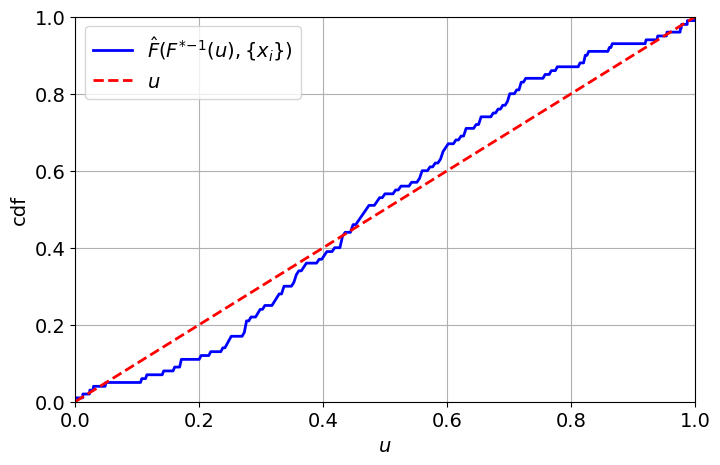

In [25]:
plt.plot(Fstar_x,Fhat_x,'b-',lw=2,label=r'$\hat{F}({F^{*}}^{-1}(u),\{x_i\})$');
plt.plot(Fstar_x,Fstar_x,'r--',lw=2,label=r'$u$');
plt.xlim(0,1);plt.ylim(0,1);plt.xlabel(r'$u$');plt.ylabel('cdf');plt.legend(loc='upper left');plt.grid();

Of course, it's the square of the difference that's added up, so we can't just eyeball the plot.

To do that, we can plot the integrand itself.  We also plot one from the Monte Carlo to show what things look like when the data actually are normal:

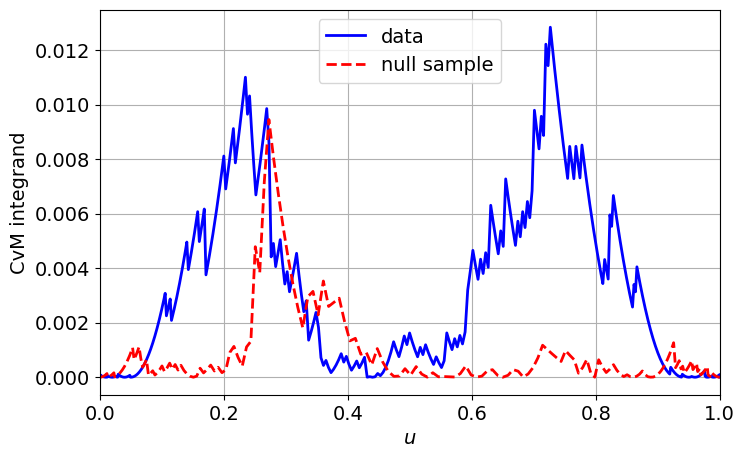

In [26]:
Fhat0_x = np.mean(x_Ii[0,None,:] <= x_x[:,None],axis=-1)
Fstar0_x = stats.norm(loc=xbar_I[0],scale=s_I[0]).cdf(x_x)
plt.plot(Fstar_x,(Fhat_x-Fstar_x)**2,'b-',lw=2,label='data');
plt.plot(Fstar0_x,(Fhat0_x-Fstar0_x)**2,'r--',lw=2,label='null sample');
plt.xlim(0,1);plt.xlabel(r'$u$');plt.ylabel('CvM integrand');plt.legend();plt.grid();

## The Anderson-Darling Test

The Cramér-von Mises is
still not very much impacted by what’s happening on the tails, though.
To probe that, we modify the statistic further, using the fact that the
squared standard error of $\hat{F}(x;\{{\color{royalblue}{X_i}}\})$ as
an estimator of $F(x)$ is
$$\operatorname{Var}(\hat{F}(x;\{{\color{royalblue}{X_i}}\})) = \frac{1}{n}F(x)[1-F(x)]$$
We thus define the *Anderson-Darling* statistic as
$$A^2 = n \int_{-\infty}^{\infty} \frac{[\hat{F}(x;\{x_i\})-F^{*}(x)]^2}
  {F^{*}(x)[1-F^{*}(x)]}\,f^{*}(x)\,dx$$ Note that this has a
chi-squared-ish construction as a sum of
$\frac{({\color{royalblue}{X}}-\mu)^2}{\sigma^2}$. (Although not
exactly, since the different $x$ values don’t represent independent
points.)

The piecewise integration is a little more complicated, but the
result is $$A^2 = - n - \sum_{i=1}^n \frac{2i-1}{n}
  \left(
    \ln [F^*(x^{(i)})] + \ln [1-F^*(x^{(n+1-i)})]
  \right)$$

We calculate $A^2 = - n - \sum_{i=1}^n \frac{2i-1}{n}
  \left(
    \ln [F^*(x^{(i)})] + \ln [1-F^*(x^{(n+1-i)})]
  \right)$ for the data set at hand:

In [27]:
A2 = -n-np.sum(((2*i_i-1.)/n)*(np.log(Fstar_i*(1-Fstar_i[::-1])))); A2

2.0771241595155914

Again, we have to ask what that value means.  There are tables of the Anderson-Darling statistic; for example, in the case where the target
distribution is normal with parameters estimated using the sample mean
and variance, the distribution of $$(A^*)^2 = A^2 \left(
    1 + \frac{0.75}{n} + \frac{2.25}{n^2}
  \right)$$ 

is described the book *Goodness-of-Fit Techniques*, edited by Raplh B. D'Agostino and Michael A. Stephens (Marcel Dekker, New York 1986, reprinted as an e-book by Taylor and Francis 2017, ISBN 978-020375306-4) which unfortunately does not seem to be available from the RIT library.

Some key critical values (helpfully quoted in Wikipedia) are
$
    P({\color{royalblue}{[A^*]^2}}{\mathbin{\ge}}0.631) \approx 0.10$, $
    P({\color{royalblue}{[A^*]^2}}{\mathbin{\ge}}0.752) \approx 0.05$, $
    P({\color{royalblue}{[A^*]^2}}{\mathbin{\ge}}0.873) \approx 0.025$, $
    P({\color{royalblue}{[A^*]^2}}{\mathbin{\ge}}1.035) \approx 0.01$, $
    P({\color{royalblue}{[A^*]^2}}{\mathbin{\ge}}1.159) \approx 0.005$. We can calculate $(A^*)^2$ and find that $p<0.005$:

In [28]:
A2star = A2*(1+0.75/n+2.25/n**2); A2star

2.0931699436478493

Again, the most reliable thing is to do (or use the results of) a Monte Carlo:

In [29]:
A2_I = -n-np.sum(((2*i_i[None,:]-1.)/n)*(np.log(Fstar_Ii*(1-Fstar_Ii[:,::-1]))),axis=-1)
np.mean(A2_I>=A2), np.max(A2_I), len(A2_I)

(0.0, 2.0148593650561395, 100000)

None of the $10^5$ Monte Carlo samples gives an $A^2$ value above $2.015$, so observed value $2.077$ is off the scale, & can only set a bound on the $p$ value.  (Could do a bigger Monte Carlo, but that eats up memory.)

Note that if the true probability of a Monte Carlo trial giving us a statistic this high is $p$, the probability that none of them will do so is
$(1-p)^{100000}\approx 1-10^5 p$.

So if we want to say with 95% confidence that $p<p^*$, we should have
$0.05 = (1-p^*)^{100000}$
or
$p^* = 1 - (0.05)^{.00001}$, i.e., $p\lesssim 3\times 10^{-5}$.

In [30]:
1-0.05**(1e-5)

2.995687401941005e-05

We can also use our Monte Carlo to check the percentiles quoted in Wikipedia

In [31]:
A2star_I = A2_I*(1+0.75/n+2.25/n**2);
for A2s in (0.631,0.752,0.873,1.035,1.159):
    print('P(A2star>=%.3f)=%g' % (A2s,np.mean(A2star_I>=A2s)))

P(A2star>=0.631)=0.0997
P(A2star>=0.752)=0.04978
P(A2star>=0.873)=0.02499
P(A2star>=1.035)=0.01
P(A2star>=1.159)=0.00497


or generate our own:

In [32]:
A2star_I = A2_I*(1+0.75/n+2.25/n**2);
for p in (90,95,97.5,99,99.5):
    A2s = np.percentile(A2star_I,p)
    print('P(A2star>=%.3f)=%g' % (A2s,np.mean(A2star_I>=A2s)))

P(A2star>=0.630)=0.1
P(A2star>=0.751)=0.05
P(A2star>=0.873)=0.025
P(A2star>=1.035)=0.01
P(A2star>=1.158)=0.005


Can examine integrand of the Anderson-Darling statistic, comparing to an example from the Monte Carlo:

/tmp/ipykernel_675068/3925998138.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(Fstar0_x,n*(Fhat0_x-Fstar0_x)**2/(Fstar0_x*(1-Fstar0_x)),'r--',lw=2,label='null sample');


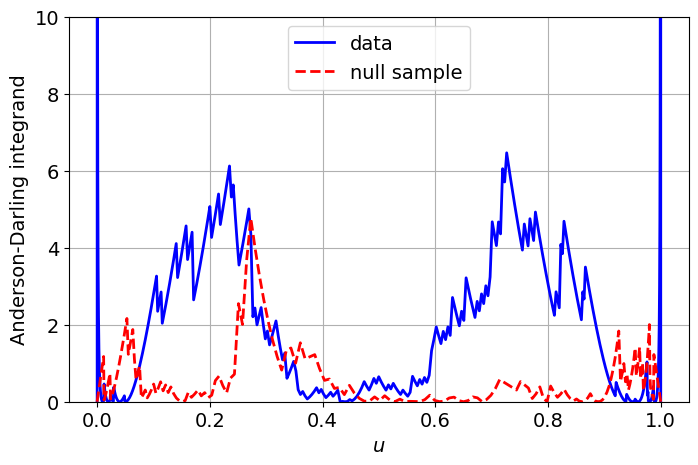

In [33]:
plt.plot(Fstar_x,n*(Fhat_x-Fstar_x)**2/(Fstar_x*(1-Fstar_x)),'b-',lw=2,label='data');
plt.plot(Fstar0_x,n*(Fhat0_x-Fstar0_x)**2/(Fstar0_x*(1-Fstar0_x)),'r--',lw=2,label='null sample');
plt.xlabel(r'$u$');plt.ylabel('Anderson-Darling integrand');plt.ylim(0,10);plt.legend();plt.grid();

Had to cut the vertical axis off because the integrand shot up to high values due to the low and high outliers:

In [34]:
np.max(n*(Fhat_x-Fstar_x)**2/(Fstar_x*(1-Fstar_x))), np.max((n*(Fhat_x-Fstar_x)**2/(Fstar_x*(1-Fstar_x)))[Fstar_x<0.5])

(21191.938032012877, 60.966887211816115)

We can't really tell if those outliers directly influenced the statistic value as much as the usual contribution from the mismatch in the middle part of the pdf, because we have a very high integrand for a very short range of $u$ values.  So we have to go back to the integrand as a function of $x$, i.e., by writing the integral as
$$A^2 = n \int_{-\infty}^{\infty} \frac{\left(\hat{F}(x;\{x_i\})-F^{*}(x)\right)^2}
  {F^{*}(x)[1-F^{*}(x)]}\,f^{*}(x)\,dx
  \quad\hbox{rather than}\quad A^2 = n \int_{0}^{1} \frac{\left(\hat{F}({F^{*}}^{-1}(u);\{x_i\})-u\right)^2}
  {u[1-u]}\,du$$

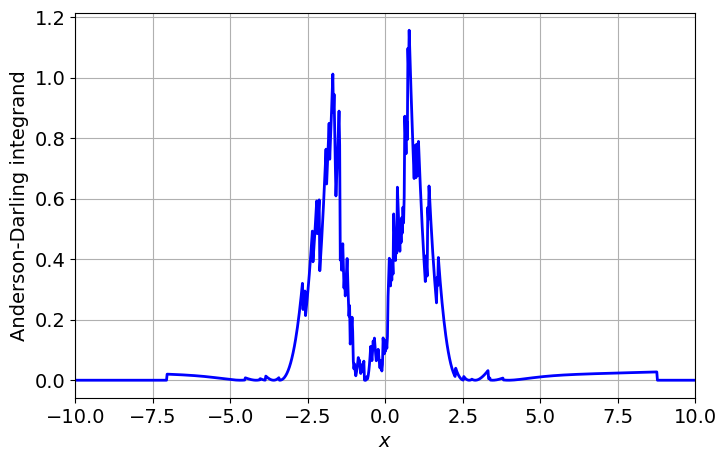

In [35]:
fstar_x = stardist.pdf(x_x); plt.plot(x_x,n*(Fhat_x-Fstar_x)**2/(Fstar_x*(1-Fstar_x))*fstar_x,'b-',lw=2);
plt.xlim(-10,10);plt.xlabel(r'$x$');plt.ylabel('Anderson-Darling integrand');plt.grid(True);

So we can see that while there are "blips" in the integrand corresponding to the high and low outliers, the area under them, while not completely negligible, is still a lot less than under the two main peaks.

## Consistency Tests for The Exponential Distribution

Another family of distributions for which it’s particularly interesting
to perform a consistency test with unknown parameters is the exponential
distribution. That’s because it arises naturally in the description of a
Poisson process: if we are noting the arrival times of independent
events with an average rate of $1/\tau$, the number of events in some
time interval of duration $T$ will be Poisson-distributed with mean
$T/\tau$, but the waiting time from one event to the next (or from an
arbitrary start time to the first event) will be exponentially
distributed, with a cumulative distribution function $$F(x) =
  \begin{cases}
    0 & -\infty < x < 0
    \\
     1 - e^{-x/\tau} & 0\le x < \infty
  \end{cases}$$ and an expectation value
$E({\color{royalblue}{X}})=\tau$. If we have a set of waiting times
$\{x_i\}$ and wish to evaluate the hypothesis that they come from an
exponential distribution with unspecified rate, it’s reasonable to use
the estimated inverse rate
$\hat{\tau}={{\overline{x}}}=\frac{1}{n}\sum_{i=1}^n x_i$ and compare
the empirical distribution $\hat{F}(x)$ to the hypothesized distribution
$$F^*(x) =
  \begin{cases}
    0 & -\infty < x < 0
    \\
     1 - e^{-x/{{\overline{x}}}} & 0\le x < \infty
  \end{cases}$$

We define the test statistics as usual as
$$\begin{gathered}
    T^{+} = \sup_x(F^*(x)-\hat{F}(x))
    = \max_i \left(1 - e^{-x^{(i)}/{{\overline{x}}}}-\frac{i-1}{n}\right)
    \\
    T^{-} = \sup_x(\hat{F}(x)-F^*(x))
    = \max_i \left(\frac{i}{n} - 1 + e^{-x^{(i)}/{{\overline{x}}}}\right)
    \\
    T = \sup_x{\left\lvert\hat{F}(x)-F^*(x)\right\rvert}
    = \max(T^{+},T^{-})
  \end{gathered}$$
  
As in the case of the Lilliefors test for normality, the null distribution for $T$ can be estimated by Monte Carlo, the results of which are summarized in tables such as Conover's Table A15.

For instance, consider the following waiting times, supposed to come from a Poisson process

In [36]:
x_i = np.array([1.06, 0.27, 4.78, 1.61, 0.28, 0.28, 1.78, 0.33, 1.81, 0.66, 2.58, 1.38, 0.32, 0.13, 1.03,
                0.09, 0.22, 2.06, 2.80, 0.55, 1.01, 3.57, 0.22, 0.42, 0.45, 1.26, 0.69, 0.67, 0.15, 1.92,
                0.48, 2.33, 0.03, 5.08, 1.88, 0.08, 3.10, 1.43, 5.39, 1.72, 4.79, 0.69, 0.91, 0.42, 2.40,
                2.27, 5.61, 2.02, 3.81, 2.31, 0.26, 1.15, 0.24, 2.25, 0.50, 0.58, 0.13, 0.06, 3.46, 6.58,
                7.87, 0.40, 0.30, 0.66, 3.96, 0.85, 0.50, 1.82, 1.84, 1.28, 0.48, 2.57, 0.85, 0.11, 0.73,
                7.28, 3.43, 1.08, 0.50, 1.72, 2.15, 0.05, 3.38, 2.38, 1.15, 4.20, 0.45, 0.25, 0.02, 0.27,
                0.36, 1.37, 0.49, 1.62, 3.45, 1.36, 1.50, 1.03, 0.55, 1.29])

In [37]:
n = len(x_i); xbar = np.mean(x_i); n, xbar

(100, 1.6188999999999998)

Now, we construct the Lilliefors statistics, using an exponential distribution with rate $1\big/\overline{x}$, i.e., scale parameter $\overline{x}$:

In [38]:
x_i.sort(); Fhatp_i = np.arange(n)/n; Fhatm_i = (1+np.arange(n))/n
stardist = stats.expon(scale=xbar); Fstar_i = stardist.cdf(x_i)
Tp = max(Fstar_i-Fhatp_i); Tm = max(Fhatm_i-Fstar_i); Tp, Tm

(0.03604509147906276, 0.07428966487794486)

In [39]:
y_i = x_i / xbar
Fstarnew_i = stats.expon.cdf(y_i)

In [40]:
Fstar_i - Fstarnew_i

array([0., 0., 0., ..., 0., 0., 0.])

According to Table A15 of Conover, when $n=100$, the median of the Lilliefors distribution for exponential samples is $0.0690$, and the 70th percentile is $0.0796$, so the observed value of $T=0.0743$ is between these, and we can say $0.3<p<0.5$, and the distribution of waiting times is consistent (according to the Lilliefors test) with this being a Poisson process.

A Monte Carlo shows that $p\approx 0.39$:

In [41]:
Nmonte = 10**5; np.random.seed(1337); x_Ii = stats.expon.rvs(size=(Nmonte,n)); x_Ii.sort(axis=-1)

In [42]:
xbar_I = np.mean(x_Ii,axis=-1); y_Ii = x_Ii / xbar_I[:,None]
Fstar_Ii = stats.expon.cdf(y_Ii)
Tp_I = np.max(Fstar_Ii - Fhatp_i[None,:], axis=-1)
Tm_I = np.max(Fhatm_i[None,:]-Fstar_Ii, axis=-1)
T_I = np.maximum(Tp_I,Tm_I)

In [43]:
np.mean(T_I >= max(Tp,Tm))

0.39281